In [ ]:
# Beginning dTreeviz
# Getting a better understanding of Decision Trees and RandomForest
# https://explained.ai/decision-tree-viz/index.html
# https://www.tensorflow.org/decision_forests/tutorials/dtreeviz_colab
# http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
# https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_tensorflow_visualisations.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import dtreeviz

In [2]:
# Import some data
df_conn = pd.read_csv(r'D:/ML/BeginningML/df_conn_100k_with_suspicious_labels.csv')
df_conn

Unnamed: 0    id.orig_h  id.orig_p    id.resp_h  id.resp_p  duration   
0               0    127.0.0.1      27762    127.0.0.1      58552       0.0  \
1               1  192.168.0.4      27761  192.168.0.4      48798       0.0   
2               2  192.168.0.4      27761  192.168.0.4      48804       0.0   
3               3    127.0.0.1      27762    127.0.0.1      58568       0.0   
4               4  192.168.0.4      48786  192.168.0.4      27761       0.0   
...           ...          ...        ...          ...        ...       ...   
99995       99995  192.168.0.4      49522  192.168.0.4       9200       0.0   
99996       99996  192.168.0.4      43972  192.168.0.4       9200       0.0   
99997       99997  192.168.0.4      44254  192.168.0.4       9200       0.0   
99998       99998  192.168.0.4      44094  192.168.0.4       9200       0.0   
99999       99999  192.168.0.4      44020  192.168.0.4       9200       0.0   

       orig_bytes  resp_bytes  orig_pkts  orig_ip_bytes  resp_pkts   
0               0           0          0              0          0  \
1               0           0          0              0          0   
2               0           0          0              0          0   
3               0           0          0              0          0   
4               0           0          0              0          0   
...           ...         ...        ...            ...        ...   
99995           0           0          0              0          0   
99996           0           0          0              0          0   
99997           0           0          0              0          0   
99998           0           0          0              0          0   
99999           0           0          0              0          0   

       resp_ip_bytes  lof_label  lof_neg_out_factor  iso_label  suspicious  
0                  0         -1       -5.383255e+12         -1           1  
1                  0         -1       -2.381626e+12         -1           1  
2                  0         -1       -1.819608e+00         -1           1  
3                  0         -1       -9.551511e+00         -1           1  
4                  0         -1       -1.510551e+12         -1           1  
...              ...        ...                 ...        ...         ...  
99995              0          1       -1.000000e+00          1           0  
99996              0          1       -1.000000e+00          1           0  
99997              0          1       -1.000000e+00          1           0  
99998              0          1       -1.000000e+00          1           0  
99999              0          1       -1.000000e+00          1           0  

[100000 rows x 16 columns]

In [4]:
# Extract the columns I would like to work with
df_conn = df_conn[['duration', 'orig_bytes', 'resp_bytes',	'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'suspicious']]
df_conn

duration  orig_bytes  resp_bytes  orig_pkts  orig_ip_bytes  resp_pkts   
0           0.0           0           0          0              0          0  \
1           0.0           0           0          0              0          0   
2           0.0           0           0          0              0          0   
3           0.0           0           0          0              0          0   
4           0.0           0           0          0              0          0   
...         ...         ...         ...        ...            ...        ...   
99995       0.0           0           0          0              0          0   
99996       0.0           0           0          0              0          0   
99997       0.0           0           0          0              0          0   
99998       0.0           0           0          0              0          0   
99999       0.0           0           0          0              0          0   

       resp_ip_bytes  suspicious  
0                  0           1  
1                  0           1  
2                  0           1  
3                  0           1  
4                  0           1  
...              ...         ...  
99995              0           0  
99996              0           0  
99997              0           0  
99998              0           0  
99999              0           0  

[100000 rows x 8 columns]

In [5]:
# All Suspicious rows
df_true = df_conn[df_conn['suspicious'] == 1].values
df_true

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [2.4013176e+02, 1.4420000e+03, 4.6456000e+04, ..., 4.5000000e+01,
        4.2680000e+04, 1.0000000e+00],
       [1.0034530e+00, 2.2400000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0038520e+00, 2.2400000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [6]:
# Get the shape of the suspicious records
df_true.shape

(857, 8)

In [8]:
# Get the number of normal record equivalent to the length of the true records
df_false = df_conn[df_conn['suspicious'] == 0].values[:len(df_true)]
df_false

array([[5.42940e-02, 2.08000e+02, 9.77000e+02, ..., 6.00000e+00,
        1.29700e+03, 0.00000e+00],
       [2.72567e-01, 2.27000e+02, 4.06607e+05, ..., 7.10000e+01,
        1.69939e+05, 0.00000e+00],
       [2.17000e-04, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        5.20000e+01, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.70000e-05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.00000e+01, 0.00000e+00]])

In [9]:
# Get the shape of the false record
df_false.shape

(857, 8)

In [10]:
# Consolidate the dataset
X = np.vstack((df_true, df_false))
X

array([[0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [5.7e-05, 0.0e+00, 0.0e+00, ..., 1.0e+00, 4.0e+01, 0.0e+00]])

In [11]:
# Get the shape
X.shape

(1714, 8)

In [12]:
# Shuffle the data
np.random.shuffle(X)

In [13]:
#df_conn = df_conn.sample(n=100)
#df_conn

In [14]:
# Set the y date
y = X[:, -1].astype(dtype=int)
y

array([1, 1, 0, ..., 1, 0, 1])

In [15]:
# Get the distribution of the labels
np.bincount(y)

array([857, 857], dtype=int64)

In [16]:
X = X[:, :-1]
X

array([[3.2243930e+00, 0.0000000e+00, 1.0020000e+04, ..., 0.0000000e+00,
        1.0000000e+00, 1.0072000e+04],
       [1.8903201e+03, 3.3836000e+04, 9.4000000e+03, ..., 4.9680000e+04,
        2.7900000e+02, 2.8770000e+04],
       [3.1416000e-01, 2.2700000e+02, 4.5473700e+05, ..., 1.0999000e+04,
        8.7000000e+01, 1.7256500e+05],
       ...,
       [8.3647000e-01, 0.0000000e+00, 0.0000000e+00, ..., 8.0000000e+01,
        2.0000000e+00, 8.0000000e+01],
       [5.3000000e-05, 0.0000000e+00, 0.0000000e+00, ..., 5.2000000e+01,
        1.0000000e+00, 4.0000000e+01],
       [4.6503262e+02, 8.9149000e+04, 2.2448000e+04, ..., 9.9862000e+04,
        2.9100000e+02, 3.4384000e+04]])

In [17]:
# Setup a Decision Tree Classifier
clf_dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=6).fit(X, y)
clf_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6)

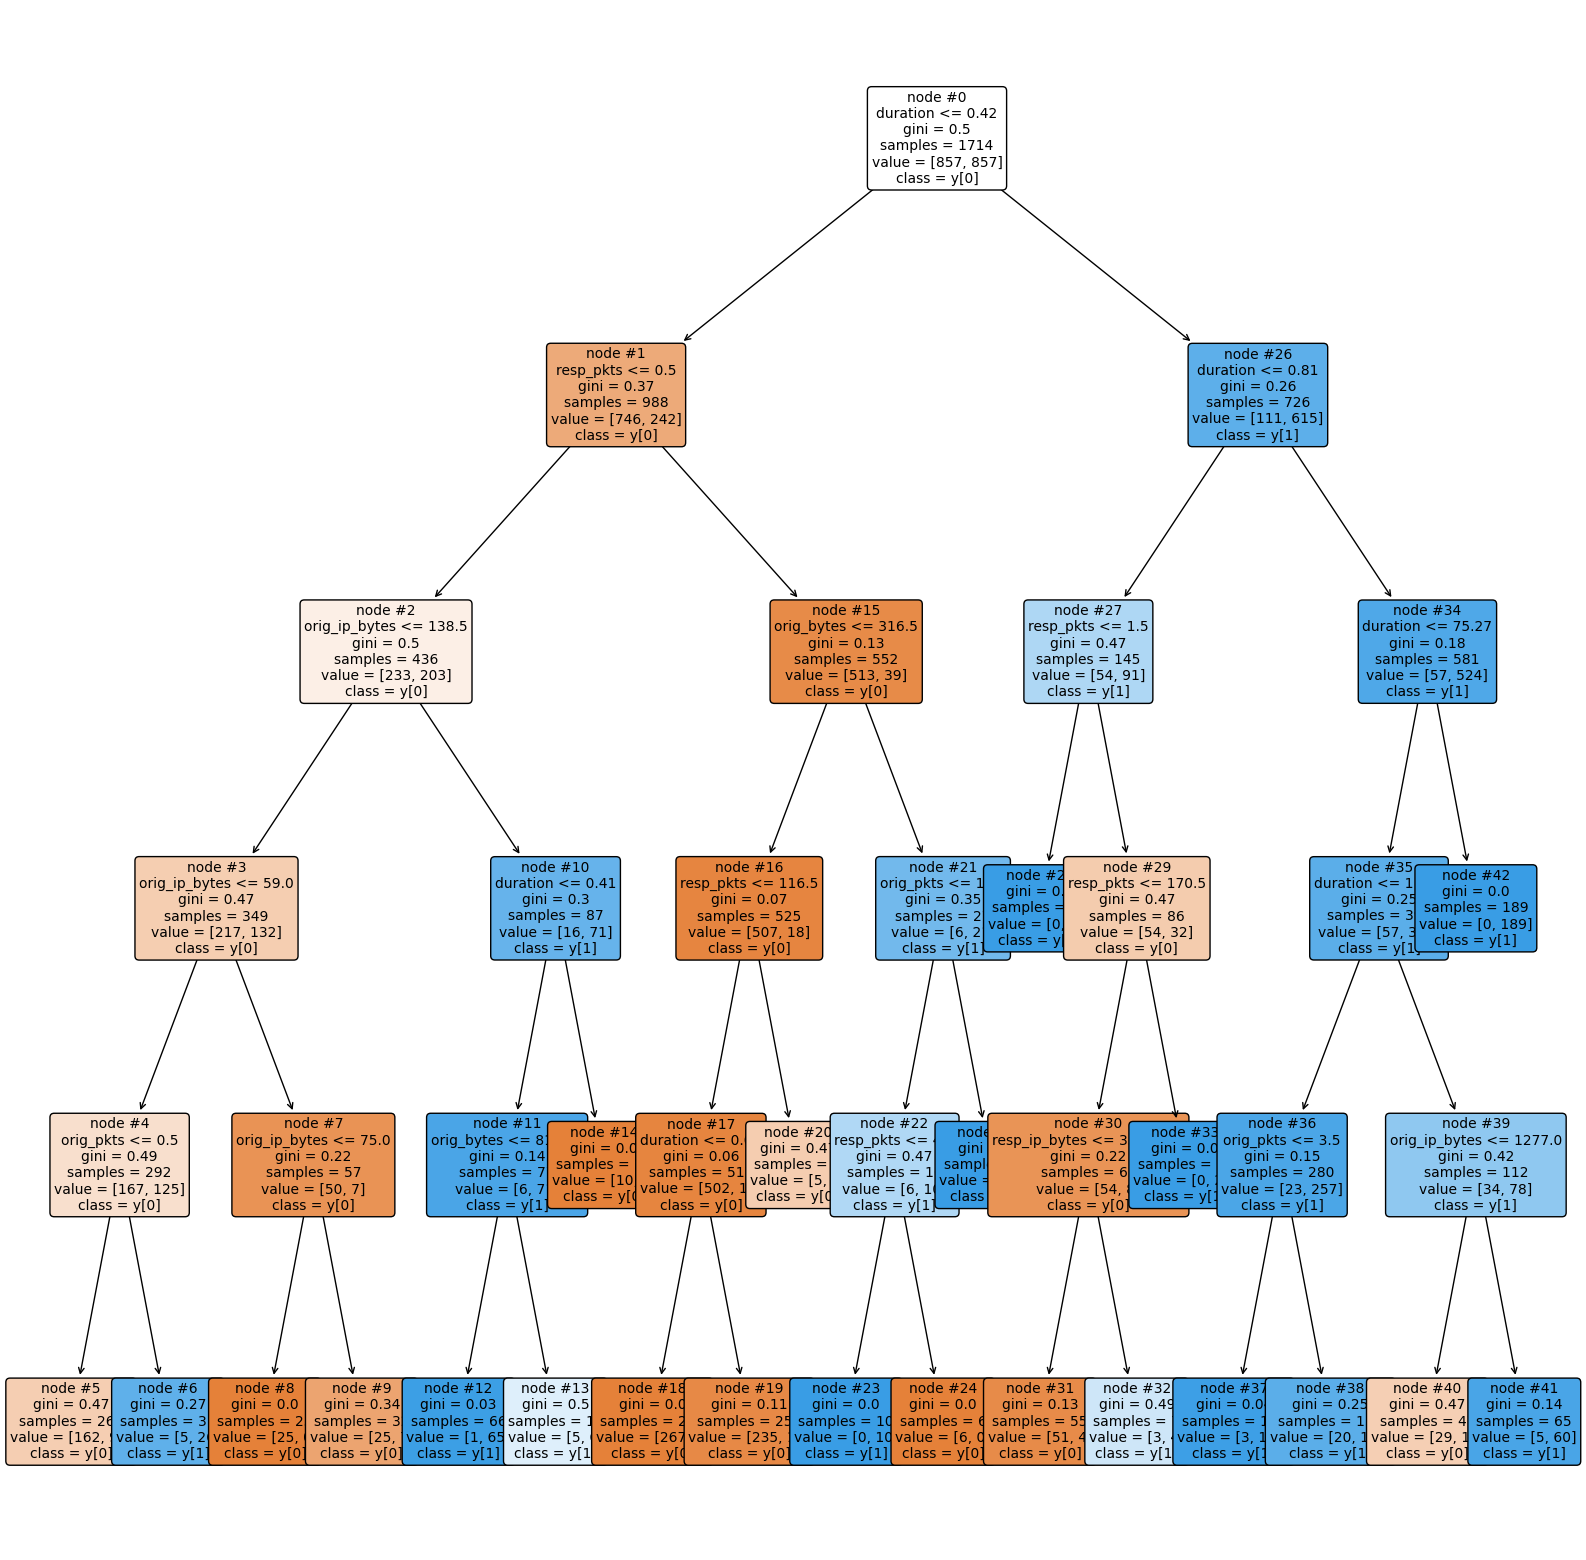

In [31]:
# Plot the tree
# Setting the precision to 2 so that this as well as dtreeviz will have the same values
# This way we can compare the two outputs somewhat clearly
plt.figure(figsize=(20,20))
plot_tree(decision_tree=clf_dt, filled=True, proportion=False, rounded=True, fontsize=10, class_names=True, node_ids=True, feature_names=['duration', 'orig_bytes',	'resp_bytes', 'orig_pkts', 'orig_ip_bytes',	'resp_pkts', 'resp_ip_bytes'], precision=2);

In [19]:
# Look at this from dtreeviz
model_viz = dtreeviz.model(model=clf_dt, X_train=X, y_train=y, tree_index=1, feature_names=['duration', 'orig_bytes',	'resp_bytes', 'orig_pkts', 'orig_ip_bytes',	'resp_pkts', 'resp_ip_bytes'], class_names=['normal', 'suspicious'])
model_viz

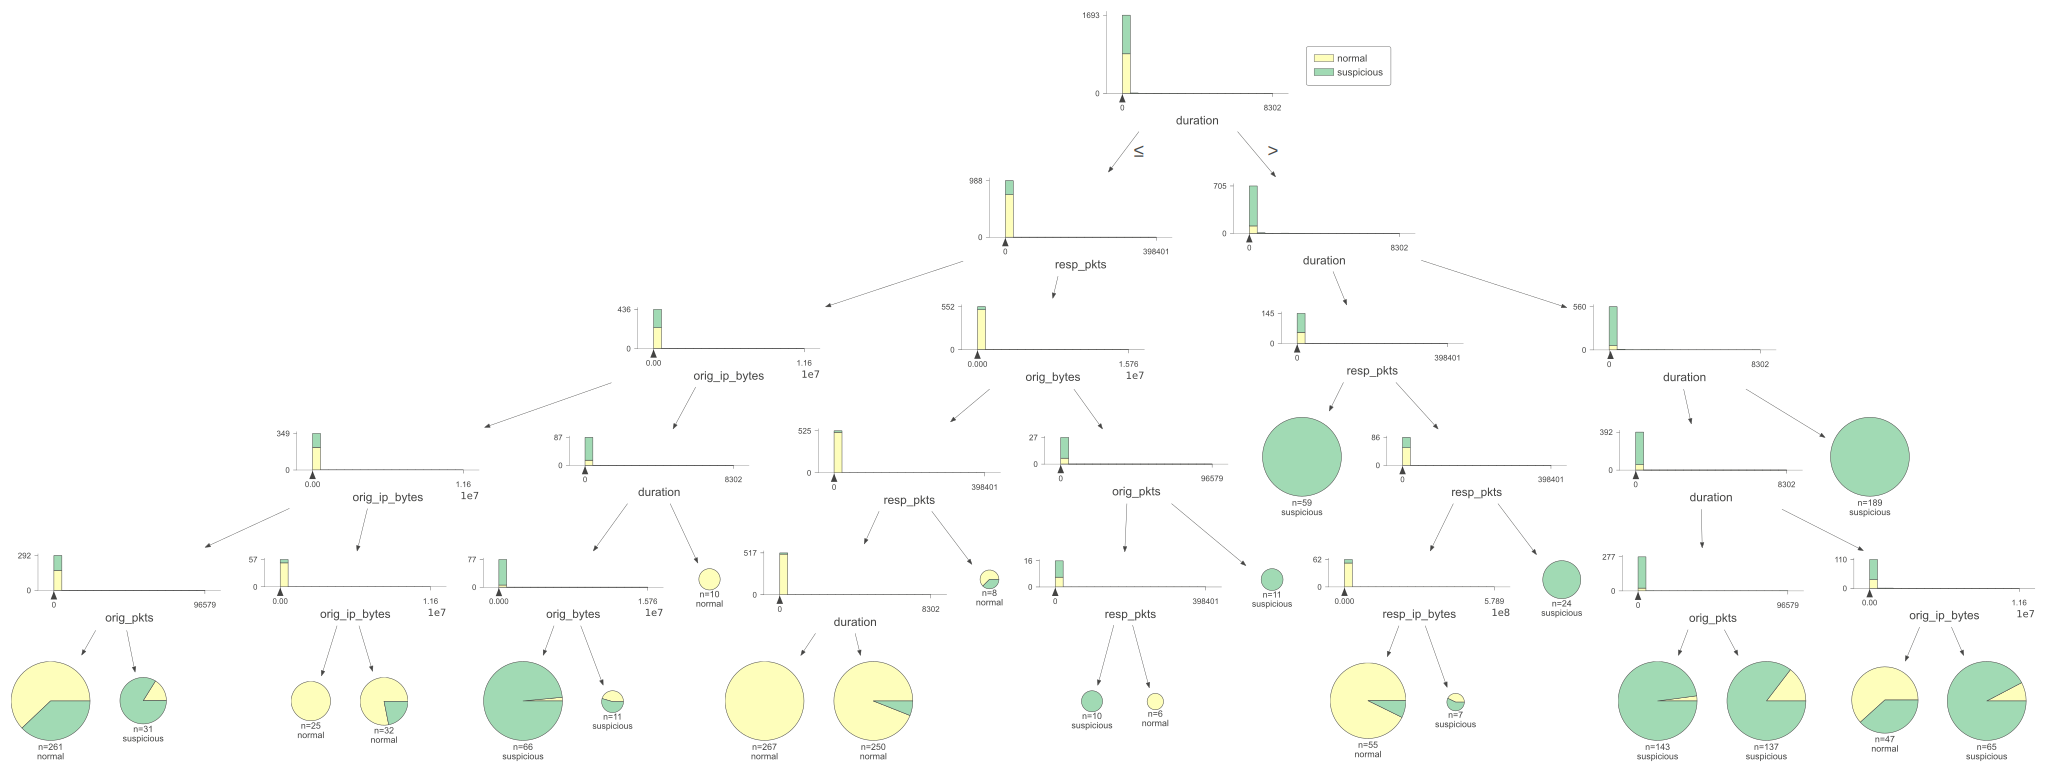

In [25]:
# The most common dtreeviz function is view
# Displays the structure of the tree and the feature distributions
model_viz.view(scale=2, fancy=True)

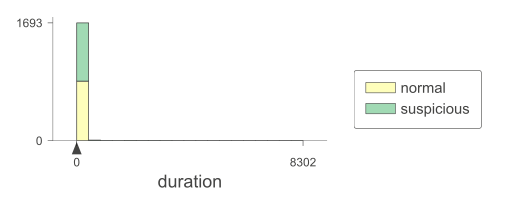

In [26]:
# Above we see that classification begins by splitting on the duration column
# Display only the root of the tree
model_viz.view(depth_range_to_display=[0, 0], fancy=True, scale=2)

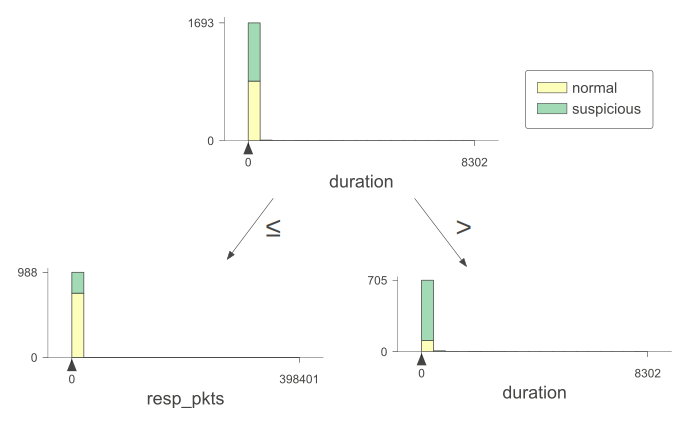

In [28]:
# Looking at the second level of the tree
model_viz.view(depth_range_to_display=[0, 1], fancy=True, scale=2)

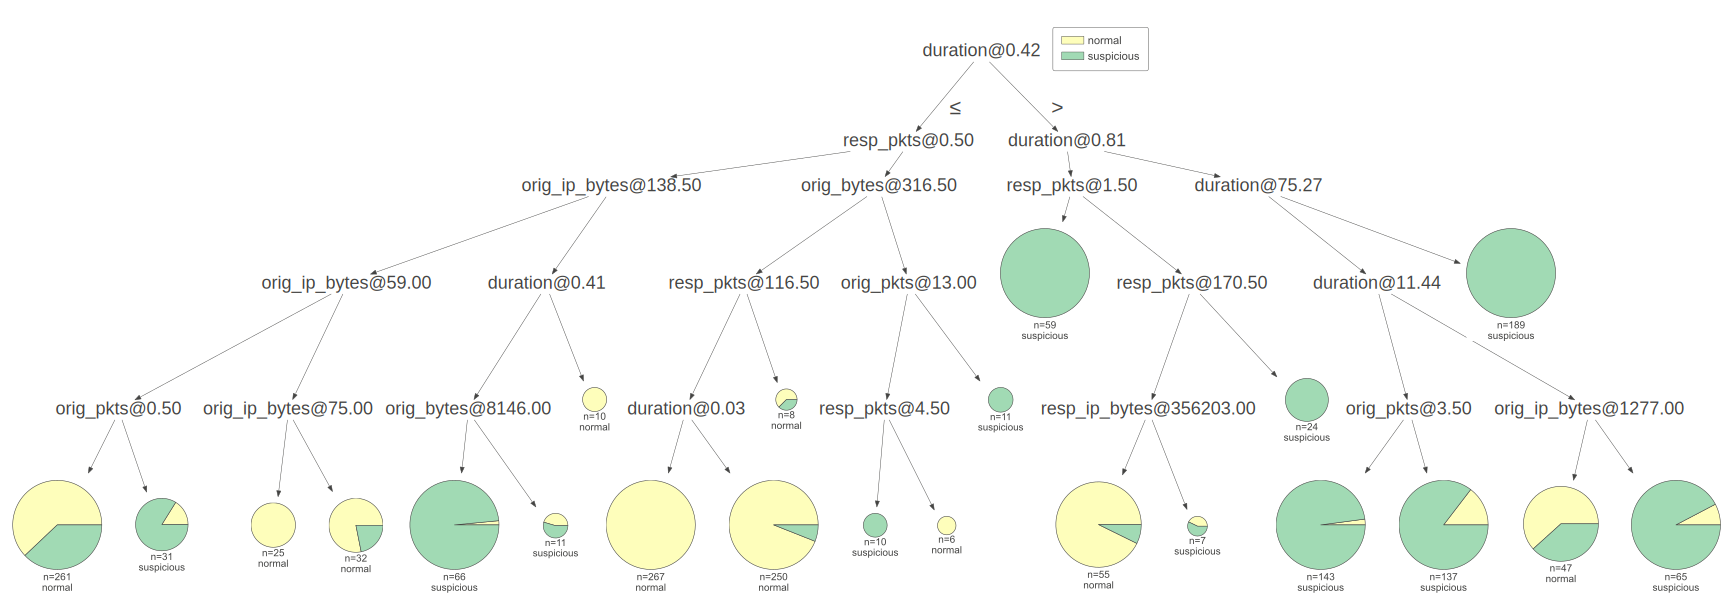

In [30]:
# Turn off the fancy output
model_viz.view(scale=1.5, fancy=False)

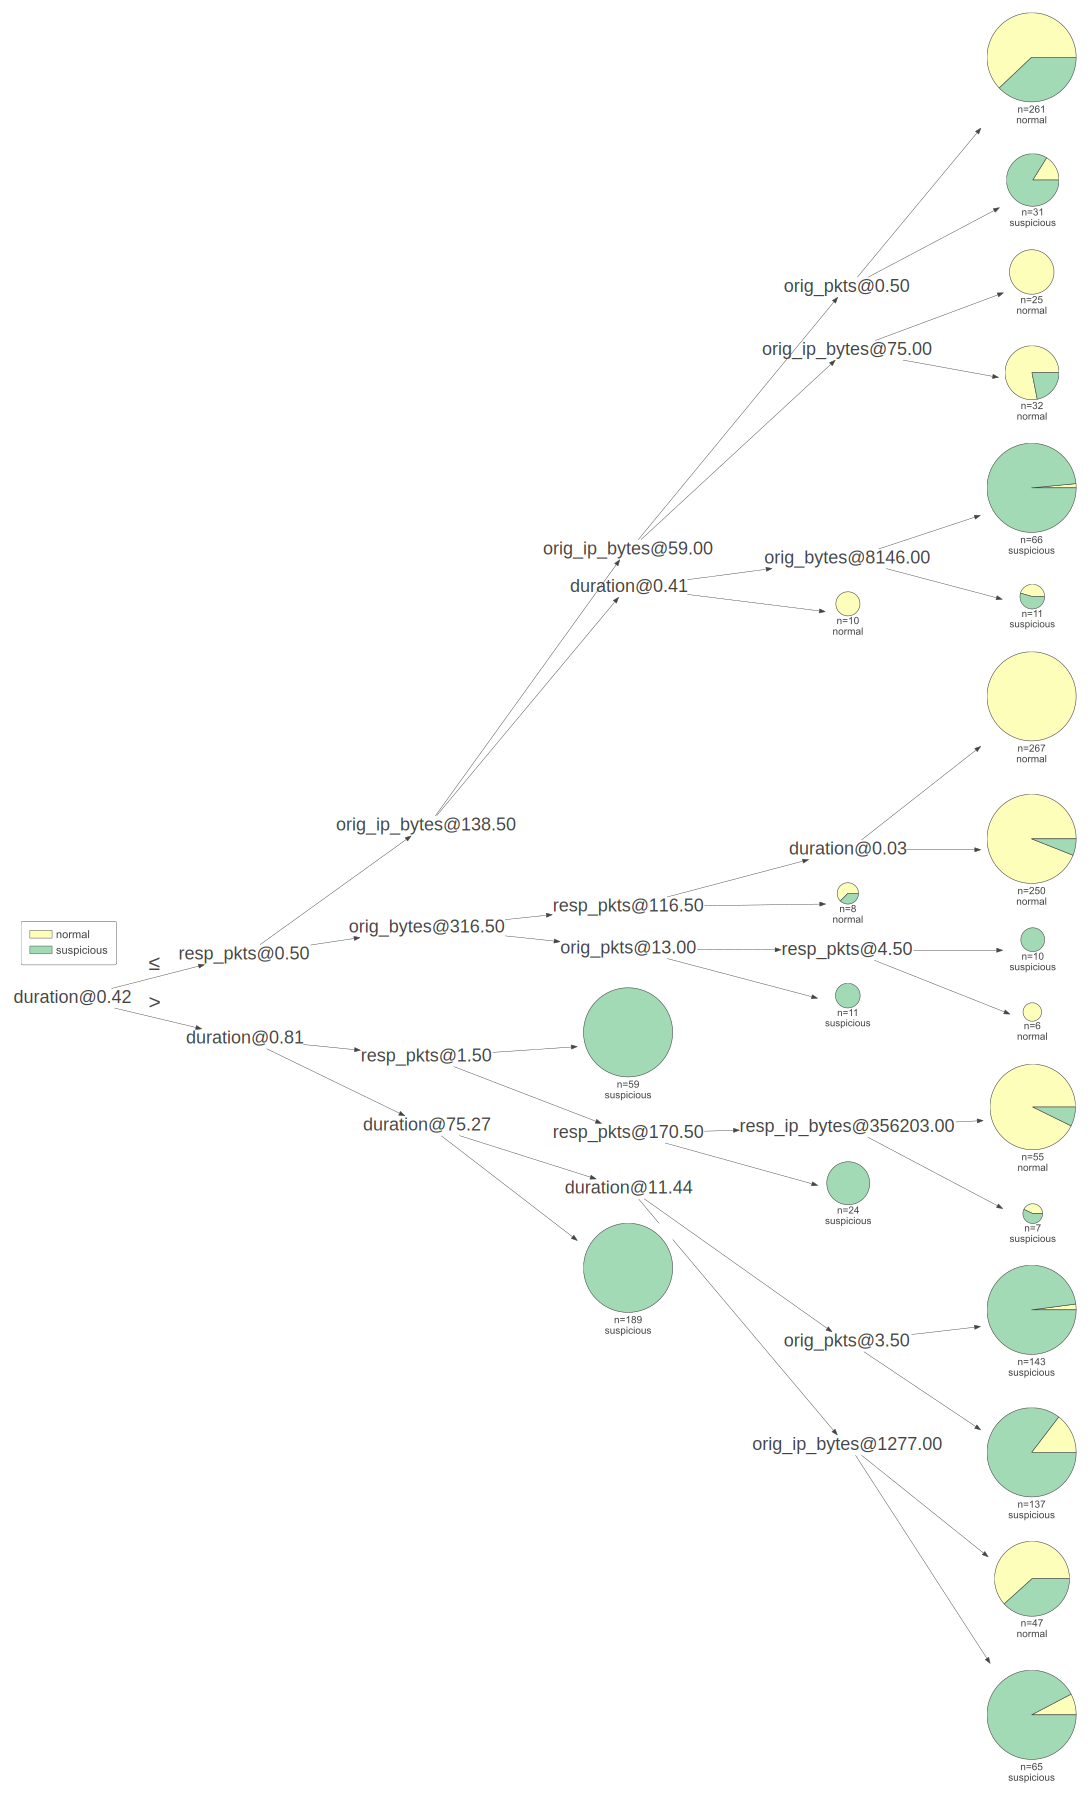

In [33]:
# Change the above plot from a top to bottom to a left to right
model_viz.view(orientation='LR', scale=1.5, fancy=False)

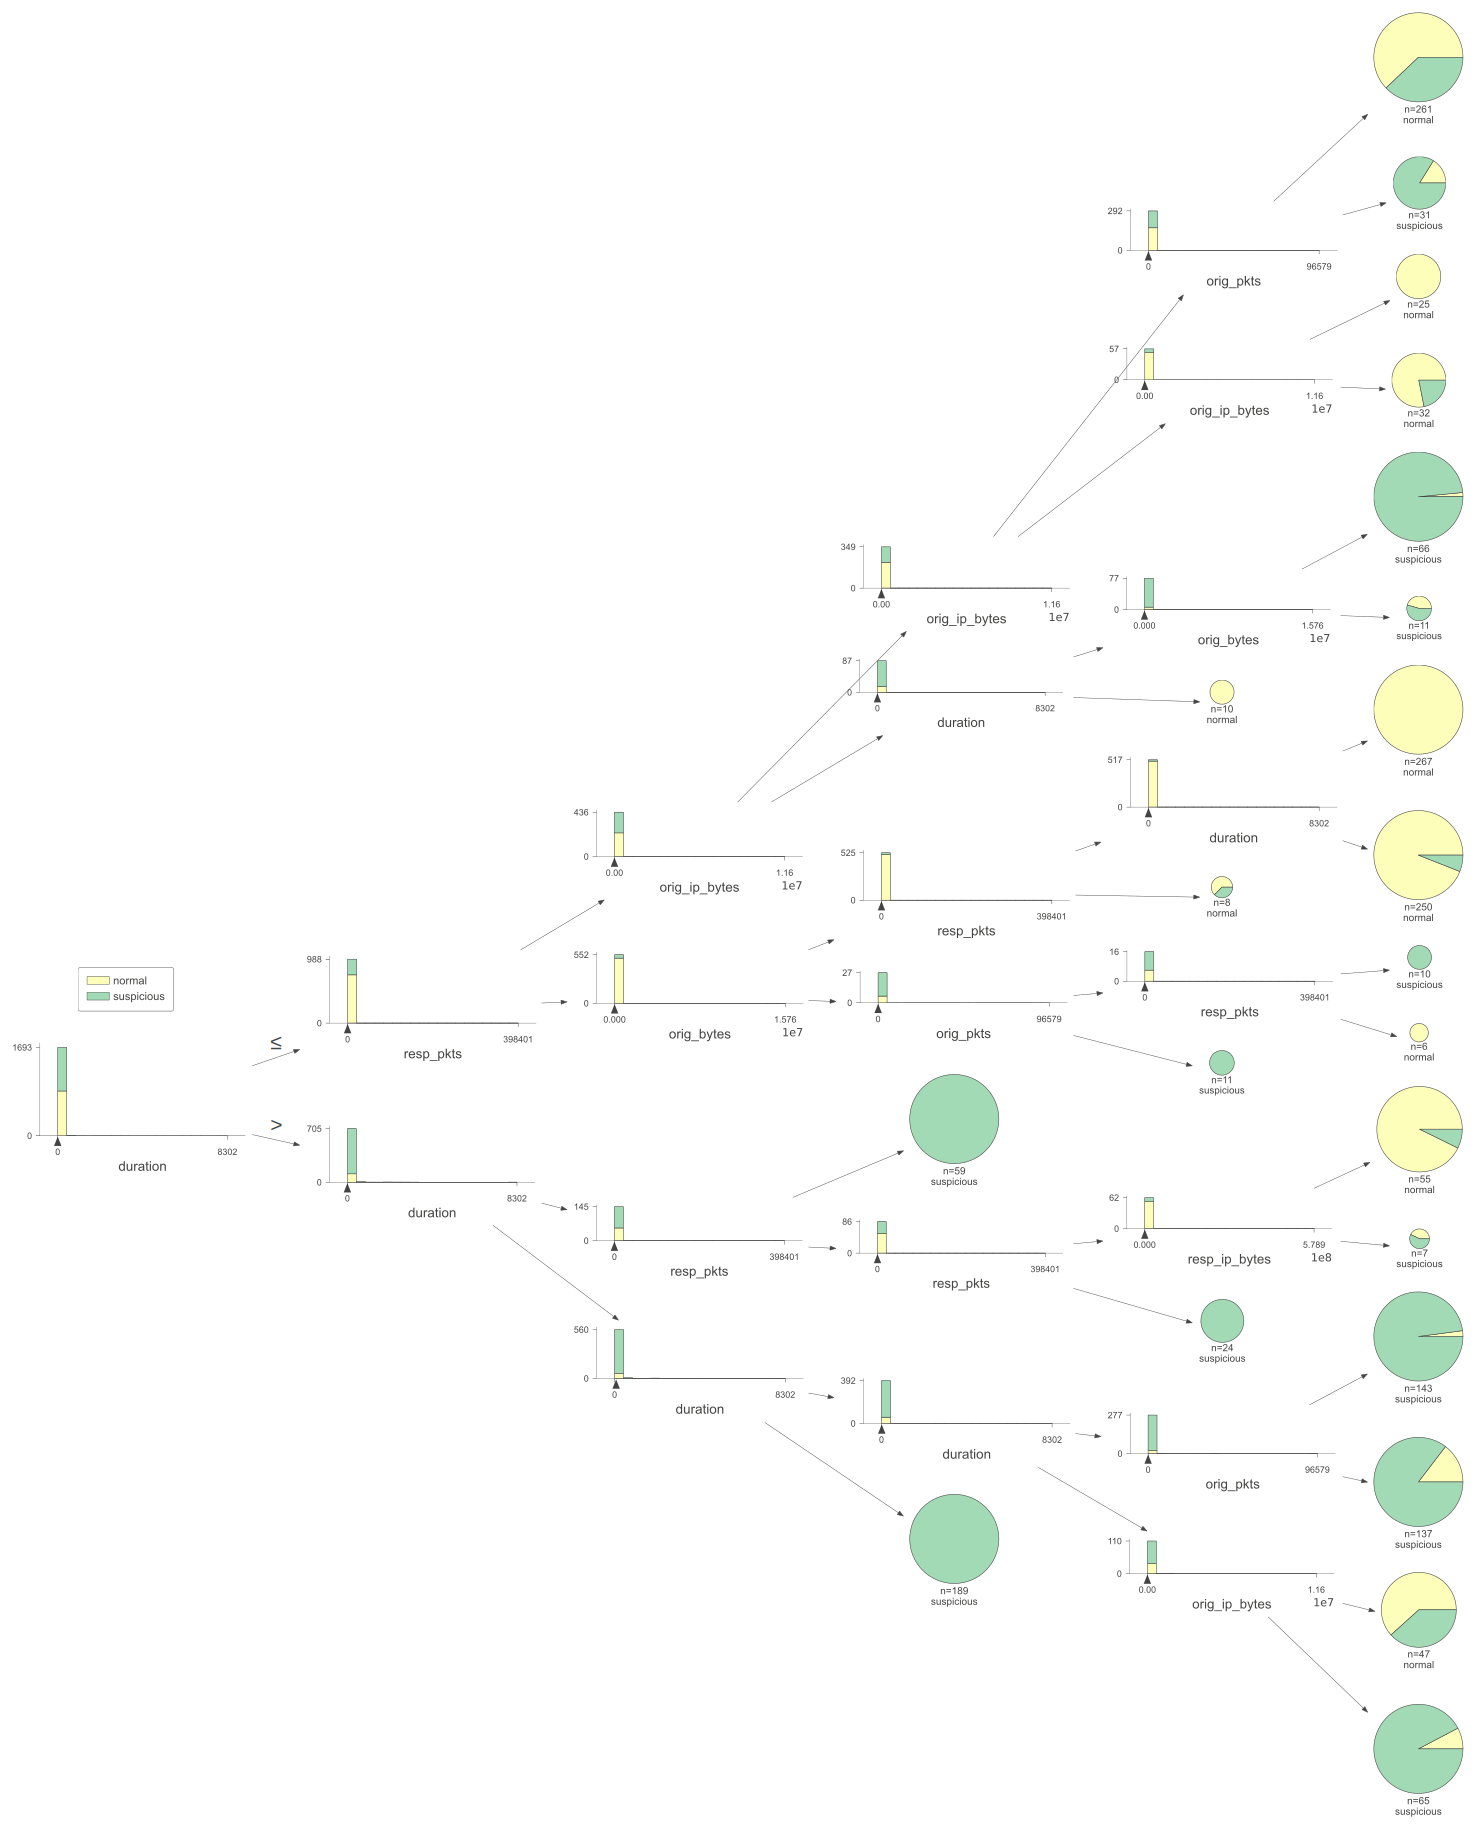

In [34]:
# Let's keep fancy as True while looking at the graph from left to right
model_viz.view(orientation='LR', scale=1.5, fancy=True)

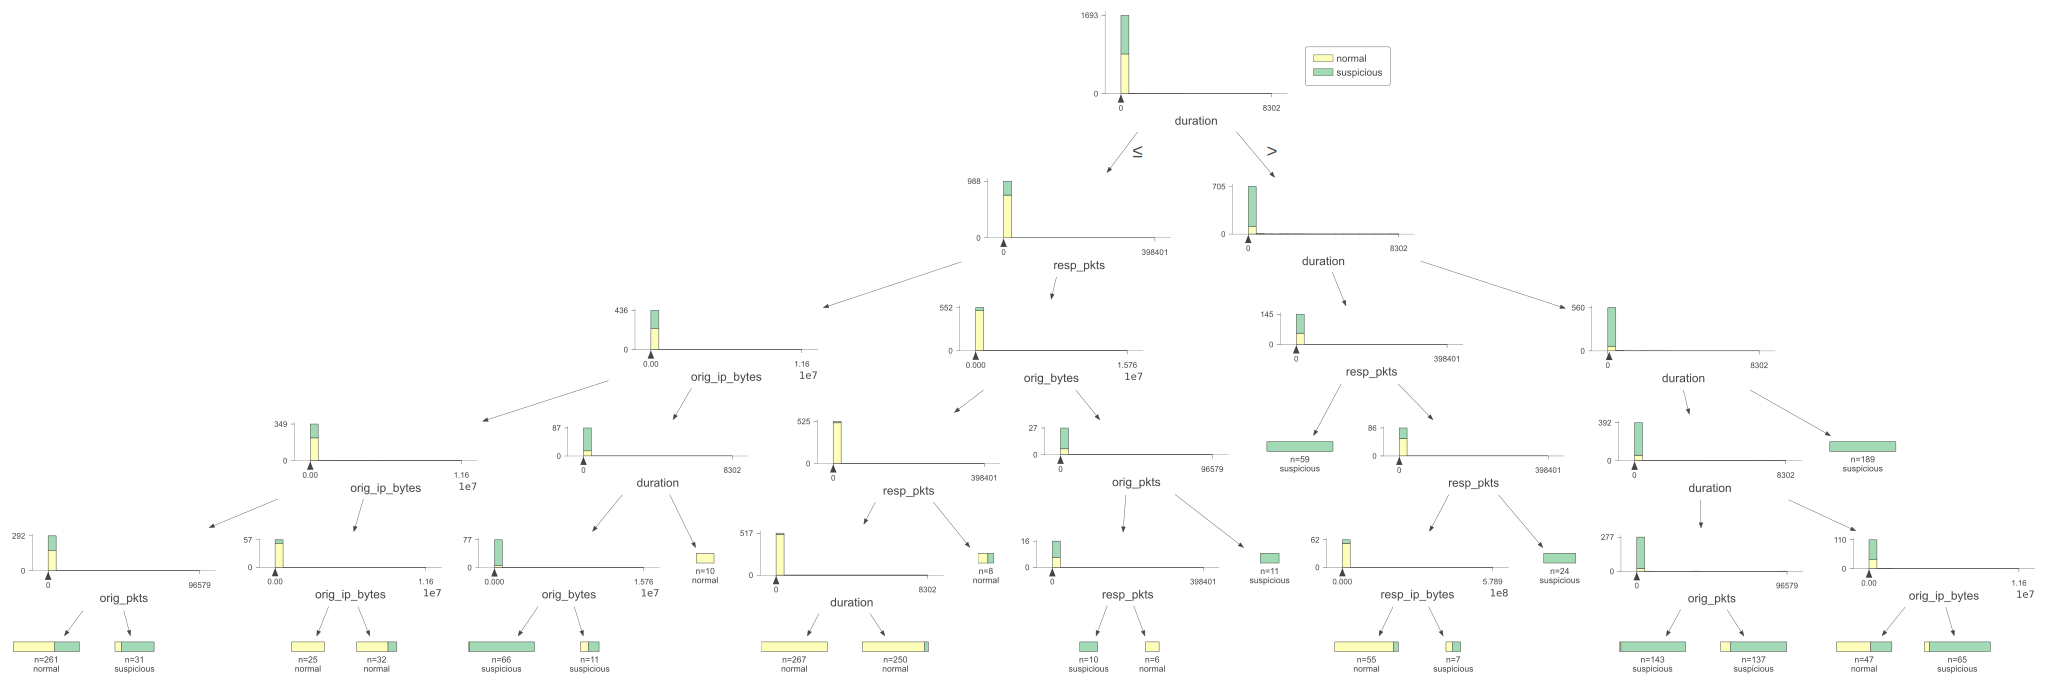

In [37]:
# Changing the leaf nodes from pie chart to bar graph
model_viz.view(scale=1.5, fancy=True, leaftype='barh')

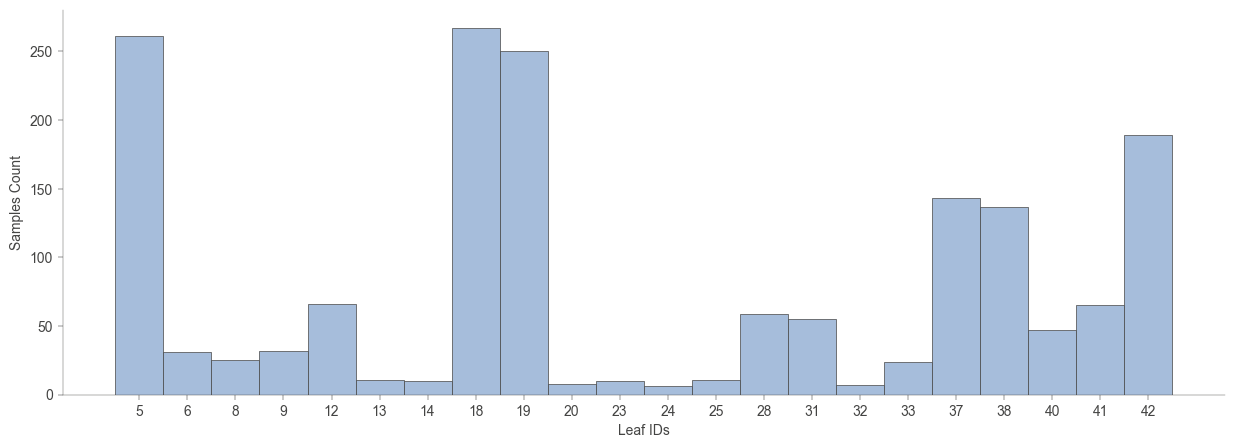

In [40]:
# Zooming in on the leaf nodes
# The sklearn plot_tree showed us 22 leaf nodes
# Here we are able to see those nodes and the number of samples in each leaf
model_viz.leaf_sizes(figsize=(15,5))

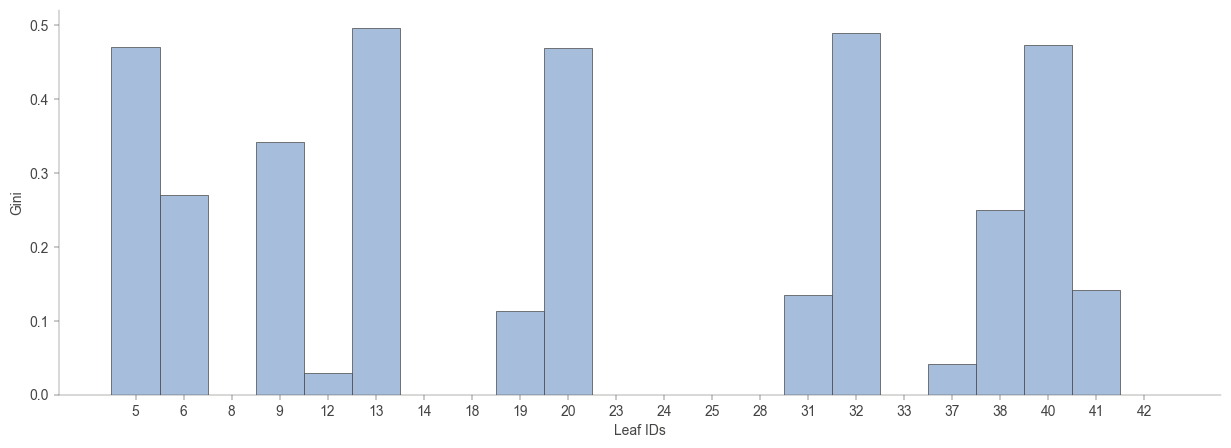

In [42]:
# Let's look at the class distributions
# Get the purity score
model_viz.leaf_purity(figsize=(15, 5))

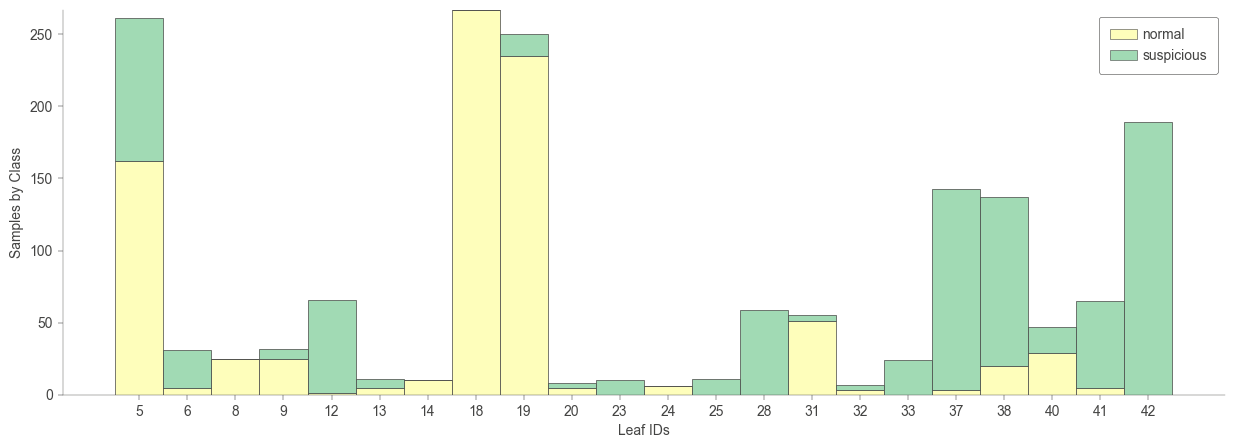

In [44]:
# Taking a look at the class distributions of the leaves
# We see below there are very few leaves that are truly pure
# however, we are still able to make predictions from these leaves as we can see the colour balance.
model_viz.ctree_leaf_distributions(figsize=(15, 5))

In [49]:
# Get the stats of the nodes
# This count correlates with what we see above in the sklearn plot_tree
# This can be considered as another view of the data in the graph above
model_viz.node_stats(node_id=0)

duration     orig_bytes       resp_bytes    orig_pkts  orig_ip_bytes   
count      1714.0         1714.0           1714.0       1714.0         1714.0  \
mean     43.01311   17595.422404    803529.275963   174.303967   18530.642357   
std    276.884888  391563.437934  15617962.152153  2757.771709   312970.56205   
min           0.0            0.0              0.0          0.0            0.0   
25%       0.00005            0.0              0.0          1.0           52.0   
50%      0.259483           88.0              0.0          3.0          196.0   
75%      3.439301          336.0          3738.25         13.0         3090.0   
max      8301.885     15759454.0      581295686.0      96579.0     11593818.0   

          resp_pkts    resp_ip_bytes  
count        1714.0           1714.0  
mean     440.428821    664542.117853  
std    10413.020995  15196015.145136  
min             0.0              0.0  
25%             0.0              0.0  
50%             1.0             64.0  
75%            10.0          2644.25  
max        398401.0      578874775.0

In [50]:
# Get the stats of the nodes
# This count correlates with what we see above in the sklearn plot_tree
model_viz.node_stats(node_id=1)

duration    orig_bytes     resp_bytes  orig_pkts  orig_ip_bytes   
count     988.0         988.0          988.0      988.0          988.0  \
mean   0.062667    899.794534   54505.952429  19.998988    1922.290486   
std    0.120709  11602.040867  169400.757624  53.855157   12108.194575   
min         0.0           0.0            0.0        0.0            0.0   
25%         0.0           0.0            0.0        0.0            0.0   
50%    0.000054           0.0            0.0        1.0           63.0   
75%    0.055091         208.0          976.0        5.0          516.0   
max    0.416739      258160.0      1646795.0      389.0       263480.0   

       resp_pkts  resp_ip_bytes  
count      988.0          988.0  
mean   11.868421   24118.720648  
std    44.441062   83124.389615  
min          0.0            0.0  
25%          0.0            0.0  
50%          1.0           40.0  
75%          5.0         1244.0  
max        919.0      1334305.0

In [52]:
# Wrap this up with node 45
# This count correlates with what we see above in the sklearn plot_tree
model_viz.node_stats(node_id=41)

duration    orig_bytes       resp_bytes    orig_pkts  orig_ip_bytes   
count       65.0          65.0             65.0         65.0           65.0  \
mean   45.412041  20705.676923        2705492.0   913.646154   49139.676923   
std     16.55257  61736.819319  17539805.029904  5337.753107  221514.345509   
min    11.615119         386.0              0.0          4.0         1283.0   
25%    33.737347        2176.0              0.0         18.0         2812.0   
50%    48.013523        3636.0           6896.0         31.0         4742.0   
75%     59.01443        7345.0          59682.0         72.0        10736.0   
max     72.63628      382869.0      137568270.0      40374.0      1675112.0   

         resp_pkts   resp_ip_bytes  
count         65.0            65.0  
mean    646.907692       1397212.4  
std    3865.117364  8633902.985726  
min            0.0             0.0  
25%            0.0             0.0  
50%           20.0          5021.0  
75%           63.0         29579.0  
max        29788.0      65956225.0

In [54]:
# Jumping to classification of a sample
# Taking the first sample in the dataset
X[0, :]

array([3.224393e+00, 0.000000e+00, 1.002000e+04, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 1.007200e+04])

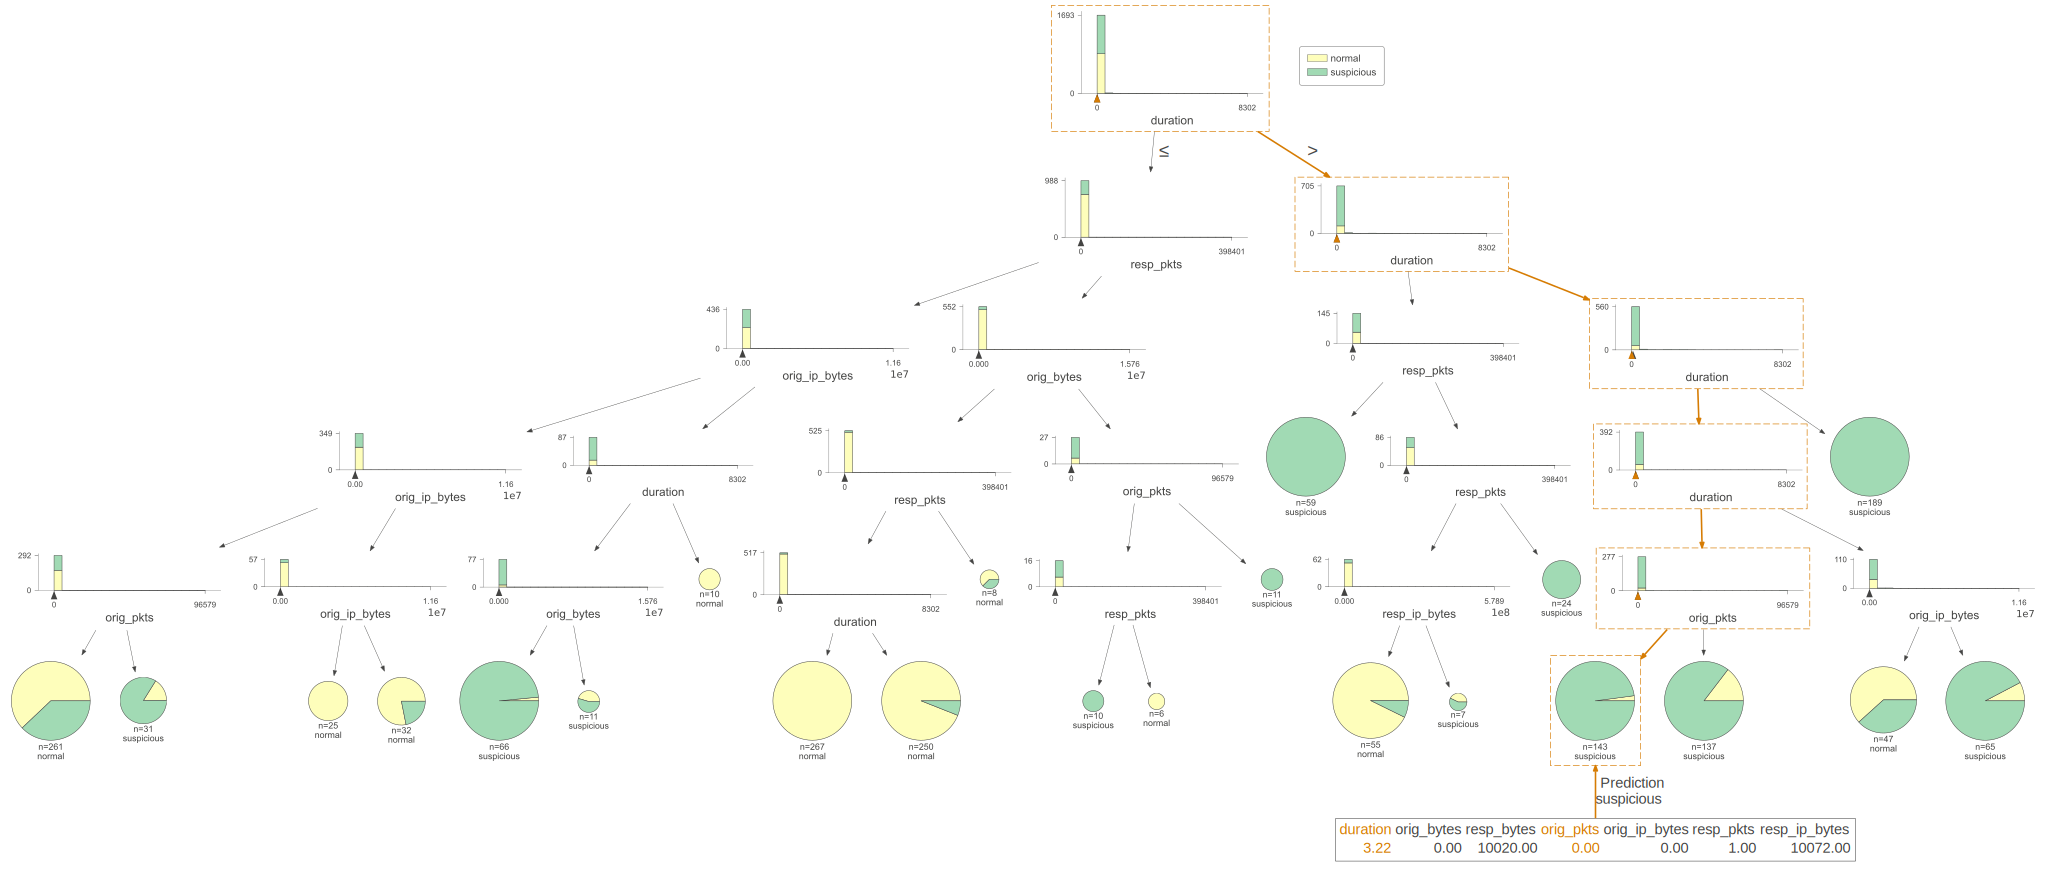

In [56]:
# Making a prediction on this sample
# If we look on the right of the root node, we see there is an orange arrow
# This arrow takes us through the path that this sample has gone through for a prediction
# Specifically, this sample is predicted as suspicious
model_viz.view(x=X[0, :], show_just_path=False, scale=2)

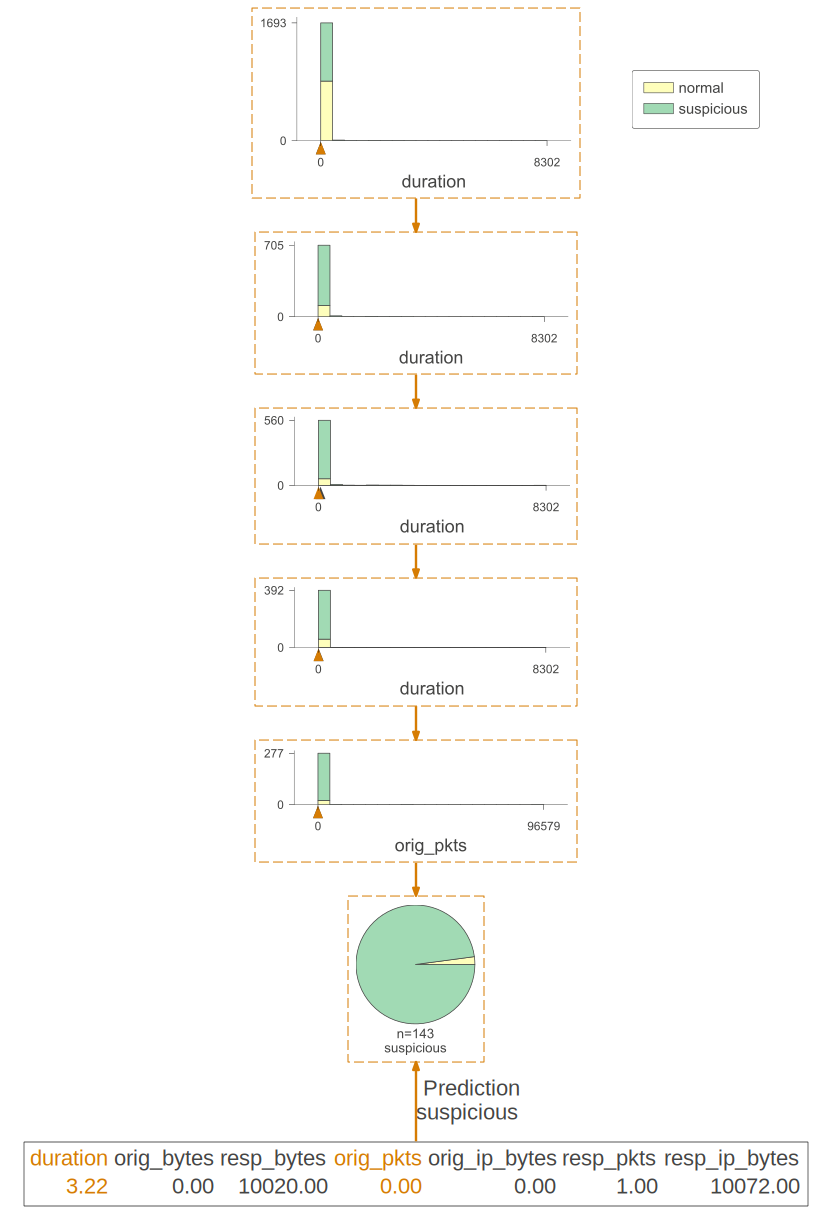

In [57]:
# Let's simplify this view, only focusing on the path taken directly to make this prediction
# Let's change the show_just_path to True
# We can see from below that duration was partitioned 4 times
# Then the orig_pkts for a final prediction of suspicious
model_viz.view(x=X[0, :], scale=2, show_just_path=True)

In [65]:
# Taking the results above in a more human readable manner
print(model_viz.explain_prediction_path(x=X[0, :]))

0.81 <= duration  < 11.44
orig_pkts < 3.5



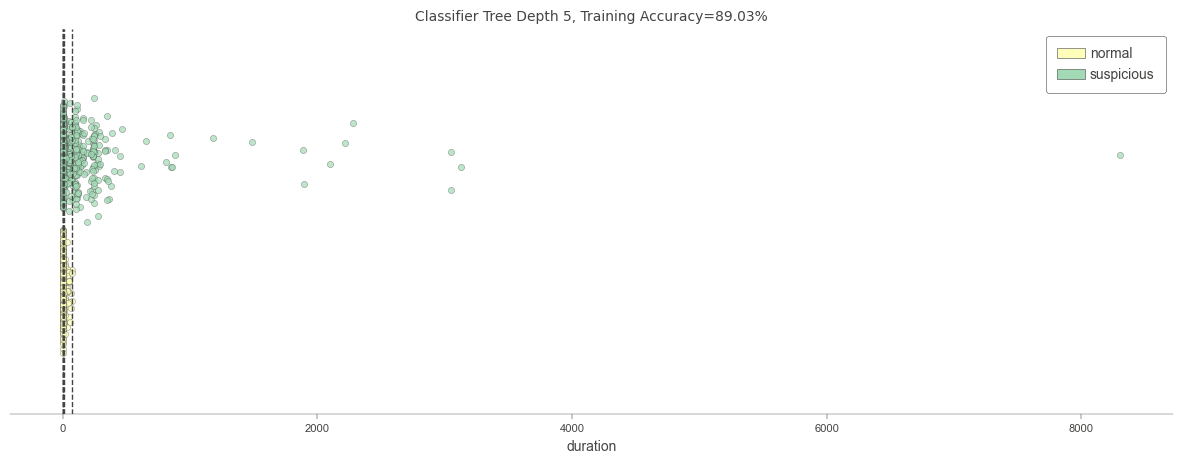

In [76]:
# considering above, let's further visualize this by looking at the partitioning from a different perspective
# Data is partitioned into groups of observations that are similar
# Because the time is in seconds, this is why it is difficult for us to see the 4 splits clearly
model_viz.ctree_feature_space(features=['duration'], show={'splits', 'legend', 'title'}, figsize=(15, 5))

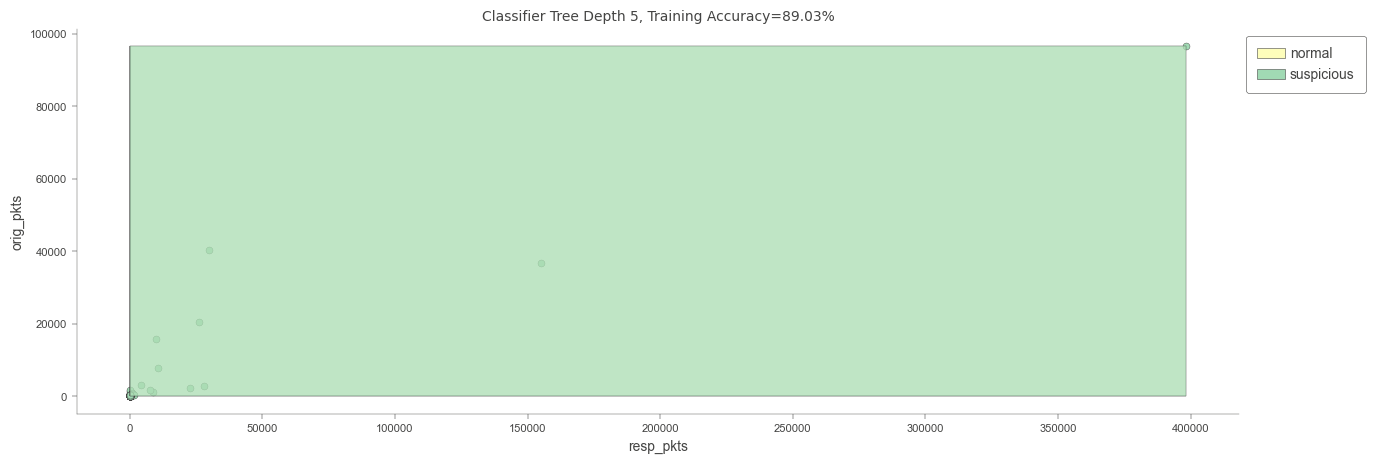

In [84]:
# Plotting two features instead of one
model_viz.ctree_feature_space(features=['resp_pkts', 'orig_pkts'], show={'splits', 'legend', 'title'}, figsize=(15, 5))

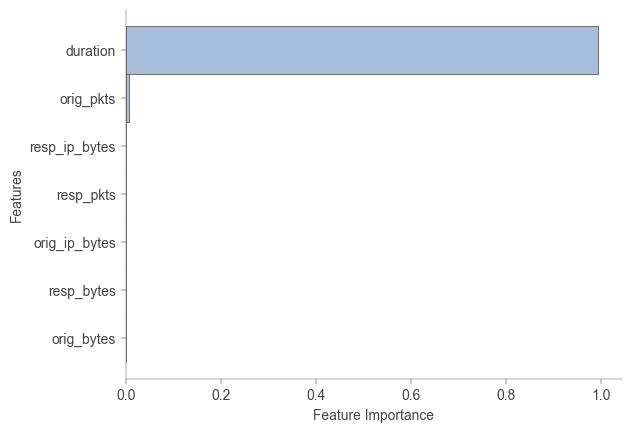

In [85]:
# Get the feature importance for a particular sample
model_viz.instance_feature_importance(x=X[:, 0])

In [ ]:
# with this understanding in place, let's build on this with RandomForest

In [92]:
# Setup the RandomForest classifier
# Note, if you set the number of trees too low, Random Forest complaints that OOB score is not available
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=3, min_samples_split=25, min_samples_leaf=20, max_features=.5, bootstrap=True, oob_score=True, n_jobs=-1).fit(X=X, y=y)
rf_clf

RandomForestClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                       min_samples_split=25, n_estimators=20, n_jobs=-1,
                       oob_score=True)

In [93]:
# Let's get the estimator template
# This returns DecisionTreeClassifier
rf_clf.estimator_

DecisionTreeClassifier()

In [96]:
# Get the OOB Score
rf_clf.oob_score_

0.8471411901983664

In [97]:
# Get the list of estimators
# Each one of these represents one of the 20 estimators
rf_clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=1277240536),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=1169097480),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=353661256),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=1250893230),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=346076832),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=976509984),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_spl

In [99]:
# Let's plot the first 5 of these
[ estimator for estimator in rf_clf.estimators_[:5] ]

[DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=1277240536),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=1169097480),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=353661256),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=1250893230),
 DecisionTreeClassifier(max_depth=3, max_features=0.5, min_samples_leaf=20,
                        min_samples_split=25, random_state=346076832)]

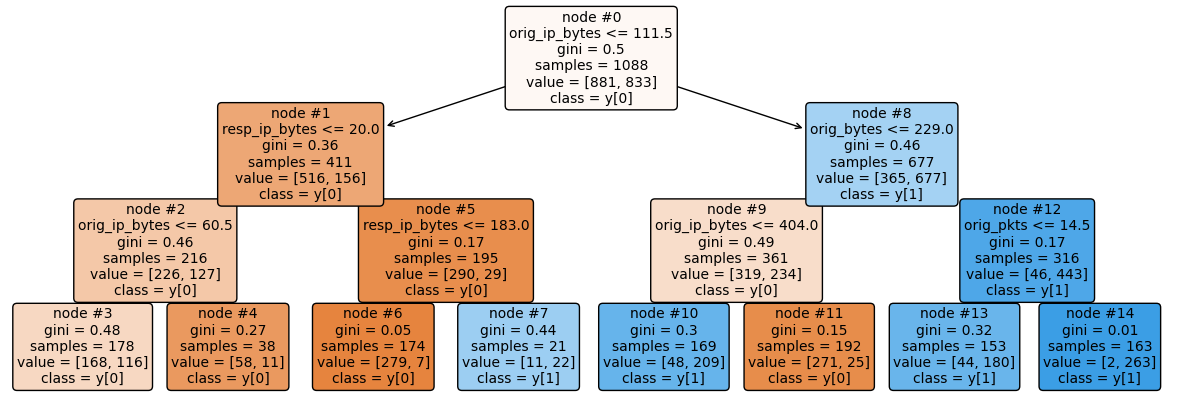

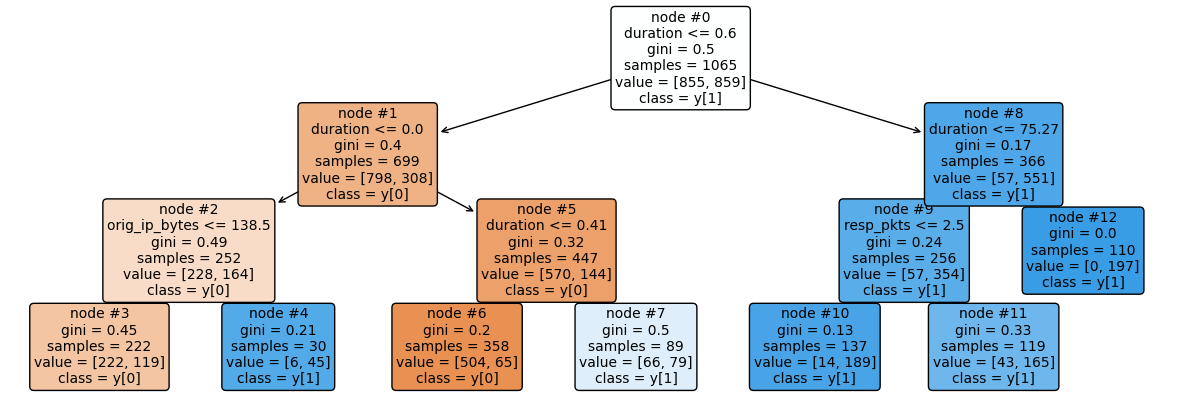

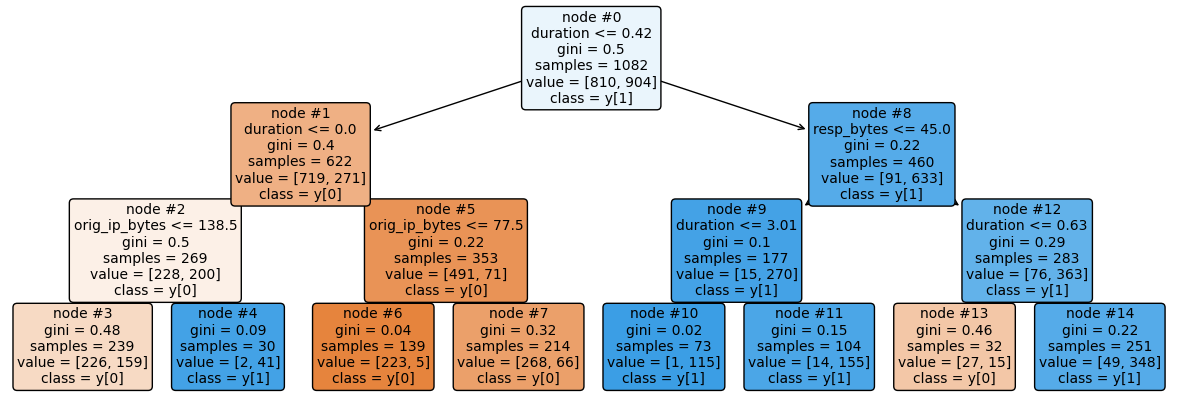

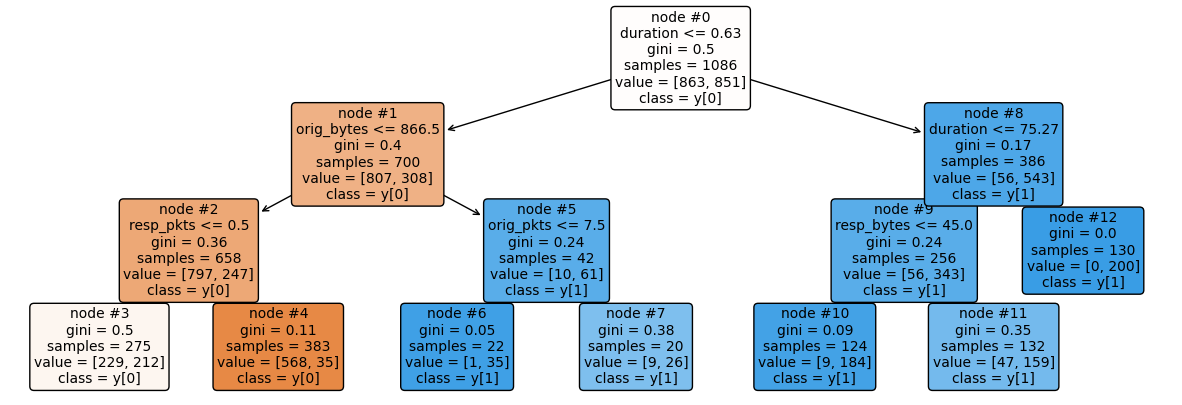

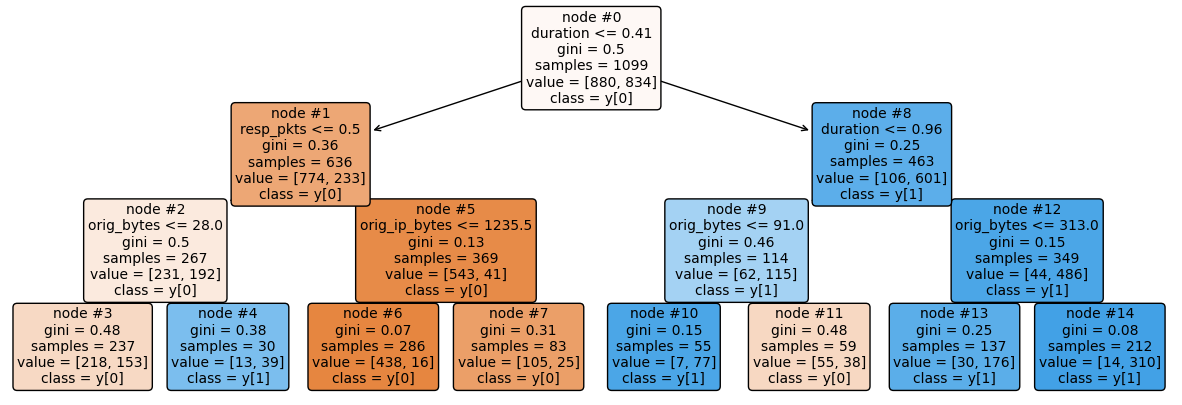

In [106]:
# Build on above
# Let's plot the first 5 of these
for estimator in rf_clf.estimators_[:5]:
    plt.figure(figsize=(15,5))
    plot_tree(decision_tree=estimator, filled=True, proportion=False, rounded=True, fontsize=10, class_names=True, node_ids=True, feature_names=['duration', 'orig_bytes',	'resp_bytes', 'orig_pkts', 'orig_ip_bytes',	'resp_pkts', 'resp_ip_bytes'], precision=2)
    plt.show()

In [137]:
# Making it prettier
# Well this does not quite give me what I wanted.
# I was expecting that I would be able to plot each of these via the for loop but this did not work and I lost patience
# If you are reading this and know what I am missing let me know
for estimator in rf_clf.estimators_[:2]:
    dtreeviz.model(model=estimator, X_train=X, y_train=y).view(scale=2, )
    plt.show()

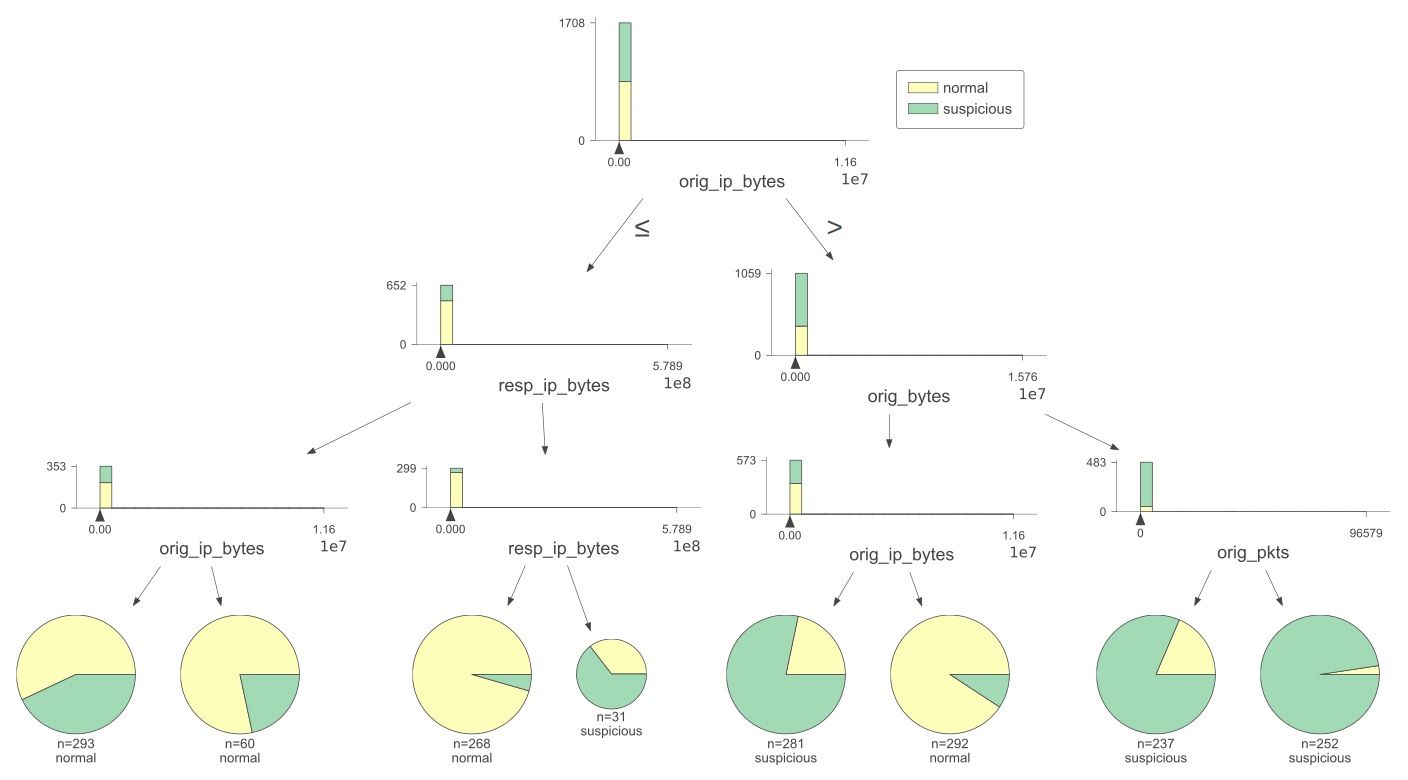

In [138]:
# Instead I will do it individually
dtreeviz.model(model=rf_clf.estimators_[0], X_train=X, y_train=y, feature_names=['duration', 'orig_bytes',	'resp_bytes', 'orig_pkts', 'orig_ip_bytes',	'resp_pkts', 'resp_ip_bytes'], class_names=['normal', 'suspicious']).view(scale=2)

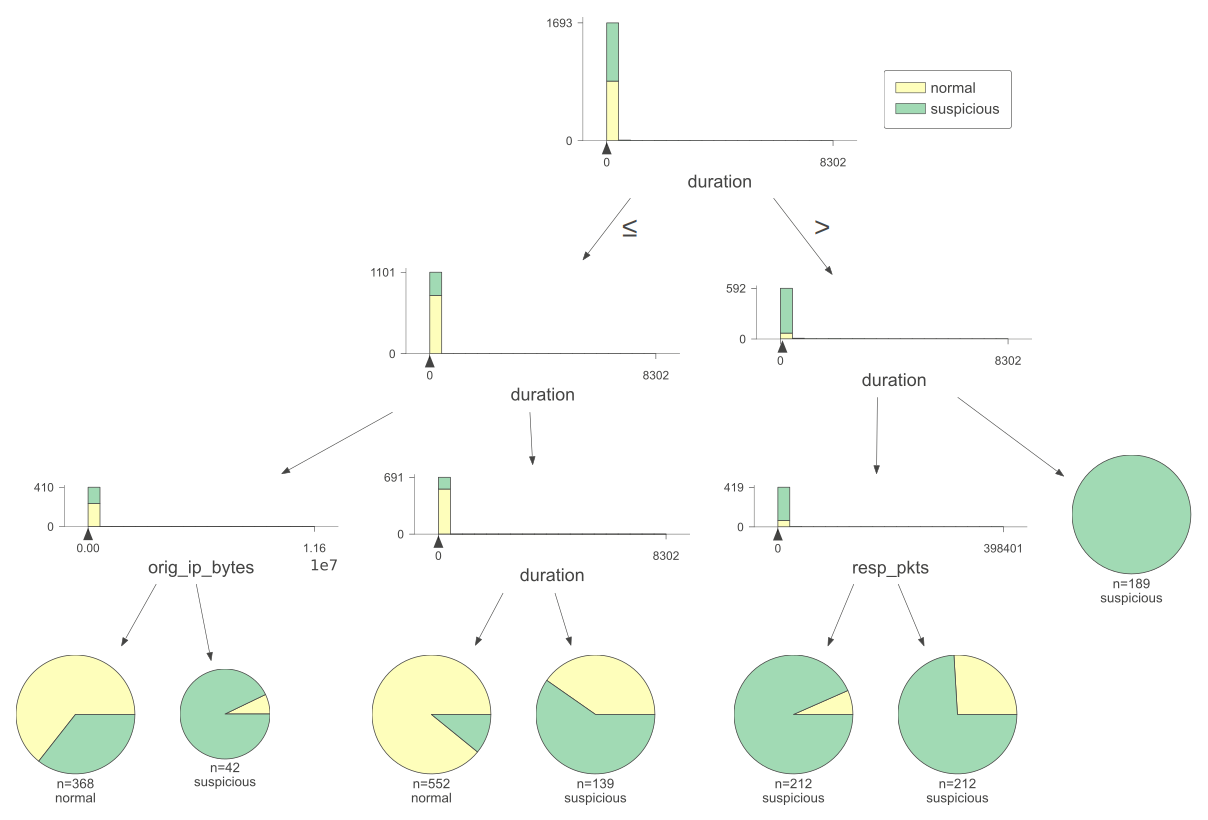

In [139]:
# Instead I will do it individually
# Looking at the second tree
dtreeviz.model(model=rf_clf.estimators_[1], X_train=X, y_train=y, feature_names=['duration', 'orig_bytes',	'resp_bytes', 'orig_pkts', 'orig_ip_bytes',	'resp_pkts', 'resp_ip_bytes'], class_names=['normal', 'suspicious']).view(scale=2)

In [146]:
# We can already see above that the two different trees are using separate splits
# Let's learn a little bit more about those trees
# Get the depth of all trees. The depth is 3 because I specified that in the constructor when I setup the RandomForest via max_depth=3
[ estimator.get_depth() for estimator in rf_clf.estimators_ ]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [147]:
# Get the number of leave in each tree
[ estimator.get_n_leaves() for estimator in rf_clf.estimators_ ]

[8, 7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8]

In [153]:
# Get the parameters for each tree in the forest
[ estimator.get_params() for estimator in rf_clf.estimators_ ]

[{'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 0.5,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 20,
  'min_samples_split': 25,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 1277240536,
  'splitter': 'best'},
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 0.5,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 20,
  'min_samples_split': 25,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 1169097480,
  'splitter': 'best'},
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 0.5,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 20,
  'min_samples_split': 25,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 353661256,
  'splitter': 'best'},
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth'

In [157]:
# Get the score of each tree on the training set
[ estimator.score(X=X, y=y) for estimator in rf_clf.estimators_ ]

[0.8249708284714119,
 0.8138856476079347,
 0.8337222870478413,
 0.8022170361726955,
 0.82438739789965,
 0.8156359393232205,
 0.8133022170361727,
 0.7374562427071178,
 0.8366394399066511,
 0.8477246207701283,
 0.8348891481913653,
 0.8144690781796966,
 0.8436406067677946,
 0.8378063010501751,
 0.8261376896149358,
 0.8273045507584598,
 0.7911318553092183,
 0.837222870478413,
 0.8366394399066511,
 0.837222870478413]

In [162]:
np.mean([ estimator.score(X=X, y=y) for estimator in rf_clf.estimators_ ]), rf_clf.score(X=X, y=y)

(0.8218203033838973, 0.8553092182030338)

In [187]:
# Get the prediction of all the trees
predictions = np.array([ estimator.predict(X=X) for estimator in rf_clf.estimators_ ])
predictions

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.]])

In [ ]:
# Closing out here now.